<div class="alert alert-block alert-info">
<h1> Case Study 2 </h1>
</div>

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%config InlineBackend.figure_format = 'retina'

In [163]:
df = pd.read_csv('casestudy.csv')
# Remove leading/trailing spaces from the email entries
df['customer_email'] = df['customer_email'].str.strip()

### 1. Dataset Description

In [164]:
df.head(10)

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
5,5,mobvusnzfr@gmail.com,39.44,2015
6,6,kxwkqvacsv@gmail.com,171.46,2015
7,7,iqmnugdcjs@gmail.com,111.99,2015
8,8,baiikostmd@gmail.com,170.70,2015
9,9,lfeafnigbu@gmail.com,54.99,2015


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


### 2. Data Preparation

In [166]:
# All Customers
print('All Customers')
dfList_all = []
for i in [2015, 2016, 2017]:
    df_tmp = df[df['year']==i]
    print(df_tmp)
    dfList_all.append(df_tmp)
    
# New Customers
print('New Customers')
dfList_nc = []
for i in [1, 2]:
    prevCList = list(dfList_all[i-1]['customer_email'])
    df_tmp = dfList_all[i][dfList_all[i]['customer_email'].isin(prevCList) == False]
    print(df_tmp)
    dfList_nc.append(df_tmp)

# Lost Customers
print('Lost Customers')
dfList_lc = []
for i in [0, 1]:
    nextCList = list(dfList_all[i+1]['customer_email'])
    df_tmp = dfList_all[i][dfList_all[i]['customer_email'].isin(nextCList) == False]
    print(df_tmp)
    dfList_lc.append(df_tmp)    
    
# Existing Customer Revenue in the current year
print('Existing Customers in the current year')
dfList_ec_cur = []
for i in [0, 1]:
    newCList = list(dfList_nc[i]['customer_email'])
    df_tmp = dfList_all[i+1][dfList_all[i+1]['customer_email'].isin(newCList) == False]
    print(df_tmp)
    dfList_ec_cur.append(df_tmp)

# Existing Customer Revenue in the previous year
print('Existing Customers in the previous year')
dfList_ec_prev = []
for i in [0, 1]:
    lostCList = list(dfList_lc[i]['customer_email'])
    df_tmp = dfList_all[i][dfList_all[i]['customer_email'].isin(lostCList) == False]
    print(df_tmp)
    dfList_ec_prev.append(df_tmp)

All Customers
        Unnamed: 0        customer_email  net_revenue  year
0                0  nhknapwsbx@gmail.com       249.92  2015
1                1  joiuzbvcpn@gmail.com        87.61  2015
2                2  ukkjctepxt@gmail.com       168.38  2015
3                3  gykatilzrt@gmail.com        62.40  2015
4                4  mmsgsrtxah@gmail.com        43.08  2015
...            ...                   ...          ...   ...
231289      231289  xtrpmgjbwp@gmail.com       216.89  2015
231290      231290  peeorxpsbr@gmail.com        39.16  2015
231291      231291  vanasezjpw@gmail.com       233.46  2015
231292      231292  dnpremlztb@gmail.com       136.27  2015
231293      231293  qsgswrpycl@gmail.com        60.24  2015

[231294 rows x 4 columns]
        Unnamed: 0        customer_email  net_revenue  year
231294      231294  mwrossuukz@gmail.com       197.26  2016
231295      231295  gkwsoupawk@gmail.com        38.28  2016
231296      231296  vlyigtgfzs@gmail.com       154.57  2016

### 3. Summary for Each Year

In [167]:
total_rev = []
nc_rev = []
ec_growth = []
rev_lost = []
ec_rev_cur = []
ec_rev_prev = []
tc_count_cur = []
tc_count_prev = []
nc = []
lc = []

for i in range(3):
    total_rev.append(sum(dfList_all[i]['net_revenue']))
    tc_count_cur.append(len(dfList_all[i]))
    
    # The information below is not relevant to the first year (2015)
    if i==0:
        nc_rev.append(np.nan)
        ec_growth.append(np.nan)
        rev_lost.append(np.nan)
        ec_rev_cur.append(np.nan)
        ec_rev_prev.append(np.nan)
        tc_count_prev.append(np.nan)
        continue
    
    nc_rev.append(sum(dfList_nc[i-1]['net_revenue']))
    ec_growth.append(sum(dfList_ec_cur[i-1]['net_revenue']) - sum(dfList_ec_prev[i-1]['net_revenue']))
    rev_lost.append(sum(dfList_lc[i-1]['net_revenue']))
    ec_rev_cur.append(sum(dfList_ec_cur[i-1]['net_revenue']))
    ec_rev_prev.append(sum(dfList_ec_prev[i-1]['net_revenue']))
    tc_count_prev.append(len(dfList_all[i-1]))

df_output = pd.DataFrame({'Total Revenue': total_rev,
                         'New Customer Revenue': nc_rev,
                         'Existing Customer Growth': ec_growth,
                         'Revenue lost from attrition': rev_lost,
                         'Existing Customer Revenue Current Year': ec_rev_cur,
                         'Existing Customer Revenue Previous Year': ec_rev_prev,
                         'Total Customers Current Year': tc_count_cur,
                         'Total Customers Previous Year': tc_count_prev},
                         index = ['2015', '2016', '2017'])
df_output

,Total Revenue,New Customer Revenue,Existing Customer Growth,Revenue lost from attrition,Existing Customer Revenue Current Year,Existing Customer Revenue Previous Year,Total Customers Current Year,Total Customers Previous Year
2015,29036749.19,NaN,NaN,NaN,NaN,NaN,231294,NaN
2016,25730943.59,1.720637e+07,39043.65,20551216.15,8524576.69,8485533.04,204646,231294.0
2017,31417495.03,2.176921e+07,63857.06,16146518.63,9648282.02,9584424.96,249987,204646.0


New customers in 2016:

In [168]:
dfList_nc[0]['customer_email']

231294    mwrossuukz@gmail.com
231295    gkwsoupawk@gmail.com
231296    vlyigtgfzs@gmail.com
231297    yfirychuhk@gmail.com
231298    trnzgqinuu@gmail.com
                  ...         
435932    tnaiqnnlpb@gmail.com
435933    sqodpufunf@gmail.com
435934    dcakqgznnm@gmail.com
435936    rdotspqdxi@gmail.com
435937    fkweqlmmjw@gmail.com
Name: customer_email, Length: 136891, dtype: object

New customers in 2017:

In [169]:
dfList_nc[1]['customer_email']

435941    qvjfterwnk@gmail.com
435944    fdkiioqtli@gmail.com
435945    vpsfdhgrfo@gmail.com
435949    pnnenkxlpj@gmail.com
435950    qkjragcrsd@gmail.com
                  ...         
685922    qzqttwiftu@gmail.com
685923    pjodiifjop@gmail.com
685924    appaplmgko@gmail.com
685925    wvkpmwsgck@gmail.com
685926    aregboumbw@gmail.com
Name: customer_email, Length: 173449, dtype: object

Lost customers in 2016 (those who made orders in 2015 but didn't in 2016):

In [170]:
dfList_lc[0]['customer_email']

0         nhknapwsbx@gmail.com
1         joiuzbvcpn@gmail.com
2         ukkjctepxt@gmail.com
3         gykatilzrt@gmail.com
4         mmsgsrtxah@gmail.com
                  ...         
231289    xtrpmgjbwp@gmail.com
231290    peeorxpsbr@gmail.com
231291    vanasezjpw@gmail.com
231292    dnpremlztb@gmail.com
231293    qsgswrpycl@gmail.com
Name: customer_email, Length: 163539, dtype: object

Lost customers in 2017 (those who made orders in 2016 but didn't in 2017):

In [171]:
dfList_lc[1]['customer_email']

231295    gkwsoupawk@gmail.com
231298    trnzgqinuu@gmail.com
231299    hhxxpwlakg@gmail.com
231303    lfeafnigbu@gmail.com
231304    cemerinvsn@gmail.com
                  ...         
435933    sqodpufunf@gmail.com
435935    mezrjfkced@gmail.com
435936    rdotspqdxi@gmail.com
435938    pidugzoeej@gmail.com
435939    kxqglfdktu@gmail.com
Name: customer_email, Length: 128108, dtype: object

### 4. Data Visualization and Observations

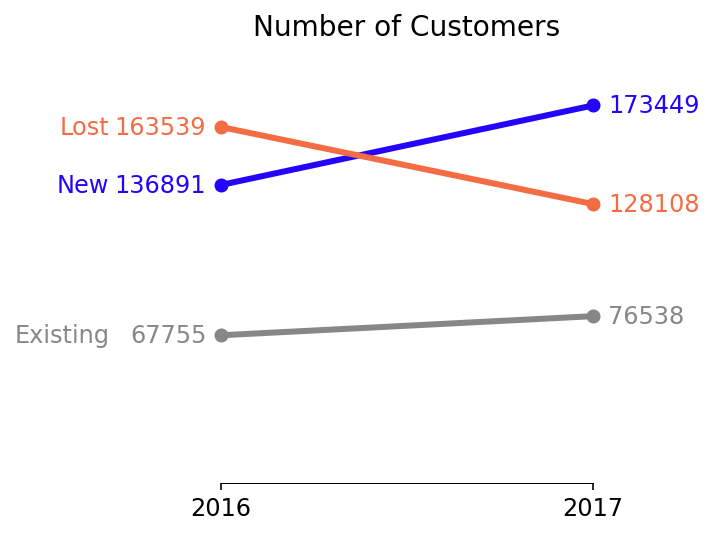

In [172]:
output1=dict()
output1['New'] = []
output1['Existing'] = []
output1['Lost'] = []

for i in range(2):
    output1['New'].append(len(dfList_nc[i]))
    output1['Existing'].append(len(dfList_ec_cur[i]))
    output1['Lost'].append(len(dfList_lc[i]))

# Slope Graph
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(0-.1,1+.1)
ax.set_ylim(0,200000) #match ylim with the range of values

for key in output1.keys():
    a,b = output1[key]
    color = '#878787'
    if key=='New':
        color = '#2205fa' #highlight new customers using blue
    if key=='Lost':
        color = '#F46C43' #highlight lost customers using red
    ax.plot([0,1], [a,b], 'o-', lw=3, c=color) #line plot with x=[0,1] y=[a,b] for each key
    ax.text(0-.04, a, f"{a:.0f}", color=color,
            horizontalalignment='right', verticalalignment='center', size=12) #print value of a
    ax.text(1+.04, b, f"{b:.0f}", color=color,
            horizontalalignment='left', verticalalignment='center', size=12)  #print value of b
    ax.text(0-.30, a, key, color=color,
            horizontalalignment='right', verticalalignment='center', size=12) #print category


ax.set_title("Number of Customers", size=14)
ax.spines['bottom'].set_bounds(0, 1)
# Set categorical ticks for x axis
ax.set_xticks([0,1])
ax.set_xticklabels(['2016','2017'], size=12)
# Remove ticks for y axis
ax.set_yticks([])

# Only show the bottom axis
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

<div class="alert alert-block alert-success">
<h3> Observation 1 </h3>

As we can see from the graph above, compared with 2016, there are 27% more new customers and 13% more existing customers in 2017, and the number of lost customers has decreased 28%. At the same time, the ratio of existing customers has remained as 30~33%.
        
</div>

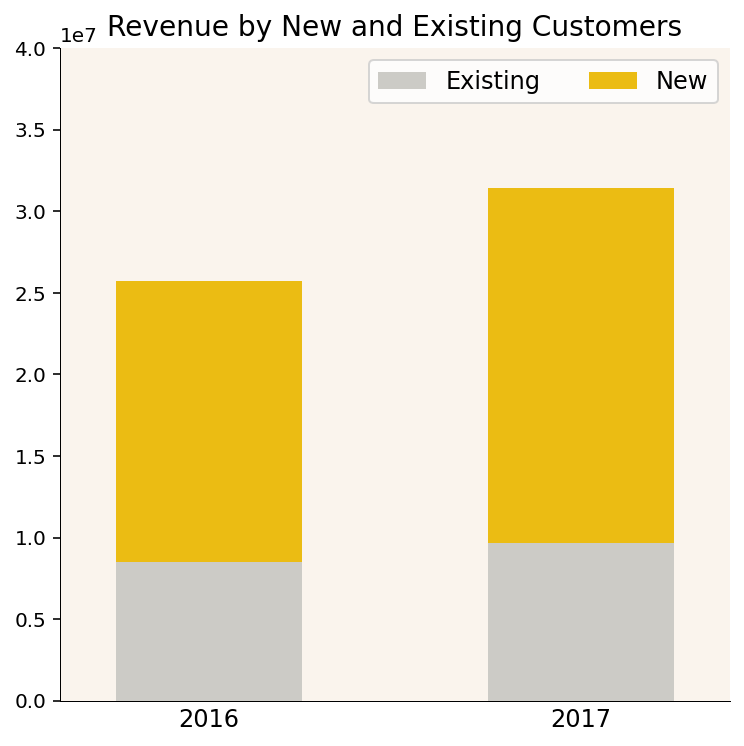

In [173]:
output2=dict()
output2['New'] = nc_rev[1:]
output2['Existing'] = ec_rev_cur[1:]

# Vertical stacked bar chart
fig,ax=plt.subplots(figsize=(6,6))
ax.set_xlim(0-.4,1+.4)
ax.set_ylim(0,4e7) #match ylim with the range of values

w = 0.5
ax.bar(np.arange(2), output2['Existing'], color='#cccbc6', label='Existing', width=w)
ax.bar(np.arange(2), output2['New'], bottom = output2['Existing'], color='#ebbc13', label='New', width=w)

ax.set_title("Revenue by New and Existing Customers", size=14)
# Set numerical y axis
ax.yaxis.set_label_coords(-0.08, 0.5)
# Set categorical ticks for x axis
ax.set_xticks([0,1])
ax.set_xticklabels(['2016','2017'], size=12)
ax.tick_params(axis='x', length=0)    #Hide ticks in x axis

# Add legend
ax.legend(bbox_to_anchor=(1, 1), ncol=2, prop={'size': 12}) 

#set background color
ax.set_facecolor("#faf4ed")


# Only show the bottom axis
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

<div class="alert alert-block alert-success">
<h3> Observation 2 </h3>

As we can see from the graph above, compared with 2016, the revenue from new customers has increased 27% and that from existing customers has increased 13% in 2017, which makes the total revenue increased by 22%. At the same time, the retention rate has remained as 30~33%, which may imply that this company is relatively early in its growth cycle, with a customer revenue mix that tilts towards new customers.
</div>